In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns

In [15]:
data = pd.read_csv("../dataset/news_politics_final.csv")

In [16]:
X_train_pipe, X_test_pipe, Y_train_pipe, Y_test_pipe = train_test_split(data["Content"], data["label"], test_size= 0.3, random_state= 42)
X_train_pipe.shape, X_test_pipe.shape, Y_train_pipe.shape, Y_test_pipe.shape

((1464,), (628,), (1464,), (628,))

In [33]:
X_test_pipe.iloc[1]

' Ðây không chỉ là mốc son chói lọi trong lịch sử dân tộc Việt Nam, mà còn là sự kiện mang tầm vóc thời đại, cổ vũ các dân tộc thuộc địa, nhân dân bị áp bức, bóc lột trên thế giới vùng lên đấu tranh giành độc lập, dân chủ và tiến bộ xã hội.  Thắng lợi của Cách mạng Tháng Tám là kết tinh của truyền thống yêu nước nồng nàn, trí tuệ và ý chí quật cường của dân tộc được phát huy lên tầm cao mới dưới sự lãnh đạo thiên tài của Ðảng Cộng sản Việt Nam và Chủ tịch Hồ Chí Minh; là kết quả tổng hợp của các phong trào cách mạng diễn ra liên tục suốt 15 năm kể từ khi có Ðảng.  Cách mạng Tháng Tám thành công đã tạo nên bước ngoặt trọng đại trong quá trình đấu tranh dựng nước và giữ nước của dân tộc. Từ đây, đất nước ta bước vào kỷ nguyên mới, kỷ nguyên độc lập dân tộc gắn liền với chủ nghĩa xã hội; nhân dân ta là người làm chủ đất nước, làm chủ vận mệnh của mình, đoàn kết một lòng xây dựng và phát triển đất nước ngày càng giàu mạnh.  Thành quả của Cách mạng Tháng Tám vô cùng to lớn, những bài học củ

In [17]:
def heatconmat(y_pred, y_test):
  cnf_matrix = confusion_matrix(y_pred, y_test)
  group_names = ['TN','FP','FN','TP']
  group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
  labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

              precision    recall  f1-score   support

        fake     0.9763    0.9796    0.9779       294
        real     0.9820    0.9790    0.9805       334

    accuracy                         0.9793       628
   macro avg     0.9791    0.9793    0.9792       628
weighted avg     0.9793    0.9793    0.9793       628



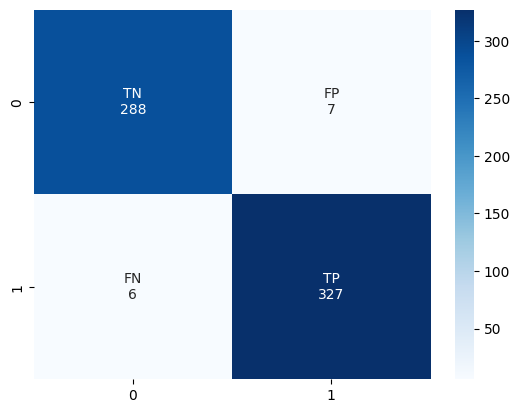

In [18]:
SVM_tf_idf = pickle.load(open("../Model_SVM/model_svm.sav", "rb"))
y_svm_tf_idf_predict = SVM_tf_idf.predict(X_test_pipe)
print(classification_report(Y_test_pipe, y_svm_tf_idf_predict, digits=4))
heatconmat(y_svm_tf_idf_predict, Y_test_pipe)

              precision    recall  f1-score   support

        fake     0.9143    0.9796    0.9458       294
        real     0.9808    0.9192    0.9490       334

    accuracy                         0.9475       628
   macro avg     0.9476    0.9494    0.9474       628
weighted avg     0.9497    0.9475    0.9475       628



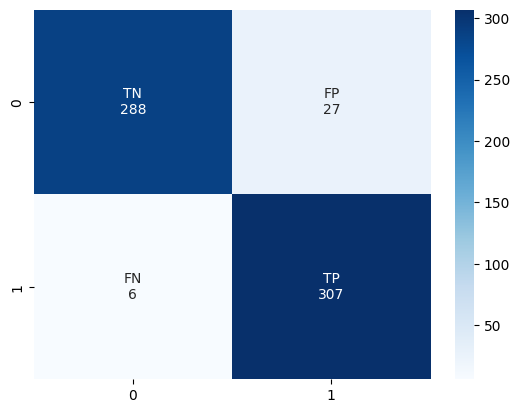

In [19]:

KNN_model = pickle.load(open("../Model_KNN/Word2Vec_pickle_KNN.pkl", "rb"))
KNN_pred = KNN_model.predict(X_test_pipe)
print(classification_report(Y_test_pipe, KNN_pred, digits=4))
heatconmat(KNN_pred, Y_test_pipe)

              precision    recall  f1-score   support

        fake     0.9267    0.9456    0.9360       294
        real     0.9512    0.9341    0.9426       334

    accuracy                         0.9395       628
   macro avg     0.9389    0.9399    0.9393       628
weighted avg     0.9397    0.9395    0.9395       628



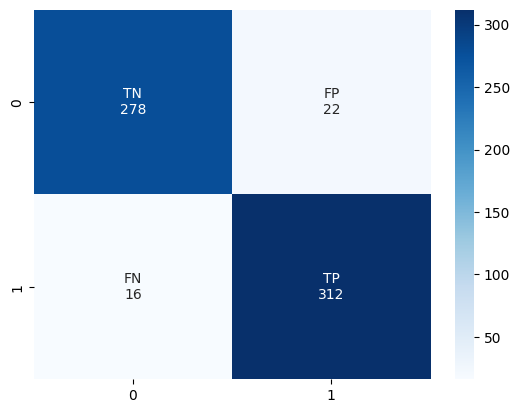

In [20]:

NB_model = pickle.load(open("../Model_NB/Word2Vec_pickle_NB.pkl", "rb"))
NB_pred = NB_model.predict(X_test_pipe)
print(classification_report(Y_test_pipe, NB_pred, digits=4))
heatconmat(NB_pred, Y_test_pipe)

20/20 [==============================] - 1s 46ms/step
              precision    recall  f1-score   support

        fake     0.9452    0.9388    0.9420       294
        real     0.9464    0.9521    0.9493       334

    accuracy                         0.9459       628
   macro avg     0.9458    0.9454    0.9456       628
weighted avg     0.9459    0.9459    0.9458       628



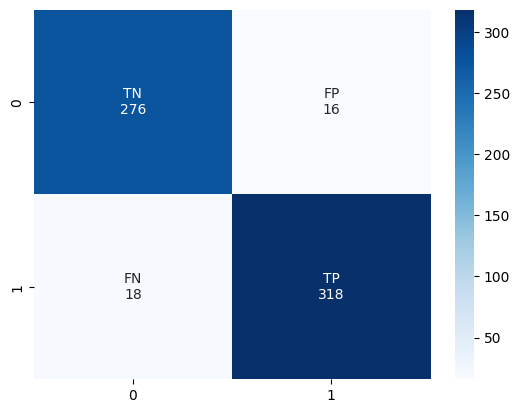

In [34]:
LSTM_model = pickle.load(open("../Model_LSTM/LSTM_pickle.pkl", "rb"))
LSTM_pred = LSTM_model.predict(X_test_pipe)
print(classification_report(Y_test_pipe, LSTM_pred, digits=4))
heatconmat(LSTM_pred, Y_test_pipe)

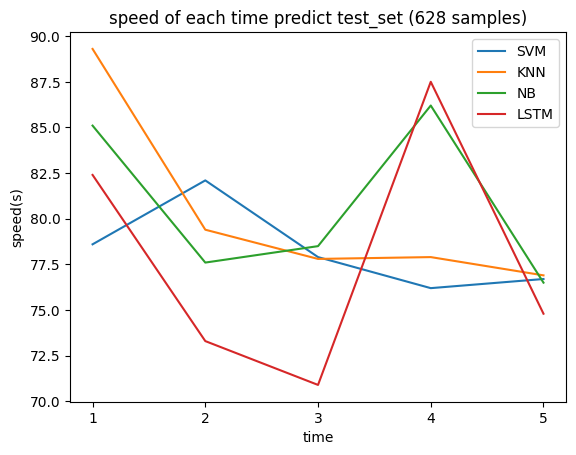

In [32]:
import matplotlib.pyplot as plt
x = [[78.6, 82.1, 77.9, 76.2, 76.7], [89.3, 79.4, 77.8, 77.9, 76.9], [85.1, 77.6, 78.5, 86.2, 76.5], [82.4, 73.3, 70.9, 87.5, 74.8]]
time = [1,2,3,4,5]
algorithm = ["SVM", "KNN", "NB", "LSTM"]
x = np.array(x)
x = x.T
fig, ax = plt.subplots()
ax.plot(time, x)
ax.legend(algorithm)
ax.set(xlabel='time', ylabel="speed(s)",
       title='speed of each time predict test_set (628 samples)')
ax.set_xticks(time)